$$ \LaTeX \text{ command declarations here.}
\newcommand{\R}{\mathbb{R}}
\renewcommand{\vec}[1]{\mathbf{#1}}
\newcommand{\X}{\mathcal{X}}
\newcommand{\D}{\mathcal{D}}
\newcommand{\d}{\mathrm{d}}
$$

In [5]:
from __future__ import division

# plotting
%matplotlib inline
from matplotlib import pyplot as plt;
import seaborn as sns
import pylab as pl
from matplotlib.pylab import cm
import pandas as pd


# scientific
import numpy as np;

# ipython
from IPython.display import Image

# EECS 445:  Machine Learning
## Lecture 11:  Information Theory and Decision Trees
* Instructor:  **Jacob Abernethy**
* Date:  October 12, 2016


## Outline

- Information Theory
    - Information, Entropy, Maximum Entropy Distributions
    - Entropy and Encoding, Cross Entropy, Relative Entropy
    - Mutual Information & Collocations
    
- Decision Trees
    - Definition of a decision tree
    - Metrics for selecting decision stumps

## Reading List

- **[PRML]**, §1.6: Information Theory
- **[MLAPP]**, §2.8: Information Theory

## Other References

- Information Theory:
    - **[Shannon 1951]** Shannon, Claude E.. [*The Mathematical Theory of Communication*](http://worrydream.com/refs/Shannon%20-%20A%20Mathematical%20Theory%20of%20Communication.pdf).  1951.
    - **[Pierce 1980]** Pierce, John R..  [*An Introduction to Information Theory:  Symbols, Signals, and Noise*](http://www.amazon.com/An-Introduction-Information-Theory-Mathematics/dp/0486240614).  1980.
    - **[Stone 2015]** Stone, James V..  [*Information Theory:  A Tutorial Introduction*](http://jim-stone.staff.shef.ac.uk/BookInfoTheory/InfoTheoryBookMain.html).  2015.

> This lecture some basics of information theory and will be introduced. These will provide some important background for **Probabilistic Graphical Models**, which is a big topic that we will cover for several following lectures. For information theory, some definitions like information, entropy, cross entropy, relative entropy, etc. are to be introduced. We could see how entropy is related to compression theory. As for applications, we will show how information theory can help us select features and find most frequent collocations in a novel.

## Information Theory

> Uses material from **[MLAPP]** §2.8, **[Pierce 1980]**, **[Stone 2015]**, and **[Shannon 1951]**.

### Information Theory

- Information theory is concerned with
    - **Compression:**  Representing data in a compact fashion
    - **Error Correction:**  Transmitting and storing data in a way that is robust to errors

- In machine learning, information-theoretic quantities are useful for
    - manipulating probability distributions
    - interpreting statistical learning algorithms

### What is Information?

- Can we measure the amount of **information** we gain from an observation?
    - Information is measured in *bits* ( don't confuse with *binary digits*, $0110001\dots$ )
    - Intuitively, observing a fair coin flip should give 1 bit of information
    - Observing two fair coins should give 2 bits, and so on...

### Information:  Definition

- The **information content** of an event $E$ with probability $p$ defined as
    $$
    I(E) = I(p) = - \log_2 p = \log_2 \frac{1}{p} \geq 0
    $$

    - Information theory is about *probabilities* and *distributions*
    - The "meaning" of events doesn't matter.
    - Using bases other than 2 yields different units (Hartleys, nats, ...)

### Information Example:  Fair Coin—$P(\text{Head})=0.5$

- **One Coin:**  If we observe one head, then
    $$
    I(\text{Head}) = - \log_2 P(\text{Head}) = 1 \;\mathrm{bit}
    $$

- **Two Coins:** If we observe two heads in a row, 
    $$
    \begin{align}
    I(\text{Head},\text{Head})
    &= -\log_2 P(\text{Head}, \text{Head}) \\
    &= -\log_2 P(\text{Head})P(\text{Head}) \\
    &= -\log_2 P(\text{Head}) - \log_2 P(\text{Head}) = 2 \;\mathrm{bits}
    \end{align}
    $$

### Information Example:  Unfair Coin

- Suppose the coin has two heads, so $P(\text{Head})=1$.  Then,
    $$
    I(\text{Head}) = - \log_2 1 = 0
    $$
    - We will gain no information!
- On the contrary, if we observe tail
    $$
    I(\text{Tail}) = - \log_2 0 = + \infty
    $$
    - We will gain *infinite* information because we observe an impossible thing!

- Information is a measure of how **surprised** we are by an outcome.


### Entropy:  Definition

- The **entropy** of a discrete random variable $X$ with distribution $p$ is
    $$
    H[X] = E[I(p(X))] = - \sum_{x \in X} p(x) \log p(x)
    $$    
    - Entropy is the expected information received when we sample from $X$.
    - Entropy measures how *surprised* we are on average
    - When $X$ is continuous random variable, summation is replaced with integral

### Entropy:  Coin Flip

- If $X$ is binary, entropy is
    $$
    H[X] = -p \log p + (1-p) \log (1-p)
    $$
    
<center>
<div class="image"   style="width:551px">
    <img src="images/Entropy_Plot.png">
</div>
</center>

- Entropy is highest when $X$ is close to uniform.
    - Large entropy $\iff$ high uncertainty, more information from each new observation
    - Small entropy $\iff$ more knowledge about possible outcomes

- The farther from uniform $X$ is, the smaller the entropy.

### Maximum Entropy Principle

- Suppose we sample data from an unknown distribution $p$, and
    - we collect statistics (mean, variance, etc.) from the data
    - we want an *objective* or unbiased estimate of $p$
    The **Maximum Entropy Principle** states that:

> We should choose $p$ to have maximum entropy $H[p]$ among all distributions satisfying our constraints.

- Some examples of maximum entropy distributions:

<table>
<thead><th>Constraints</th><th>Maximum Entropy Distribution</th></thead>
<tbody>
    <tr><td>Min $a$, Max $b$</td><td>Uniform $U[a,b]$</td></tr>
    <tr><td>Mean $\mu$, Support $(0,+\infty)$</td><td>Exponential $Exp(\mu)$</td></tr>
    <tr><td>Mean $\mu$, Variance $\sigma^2$</td><td>Gaussian $\mathcal{N}(\mu, \sigma^2)$</td></tr>
</tbody>
</table>

- Later, **Exponential Family Distributions** will generalize this concept.

### Entropy and Encoding: Communication Channel

- Now let's see how entropy is related to encoding theory
- **Communication channel** can be characterized as:
    - **[Source]** generates messages.
    - **[Encoder]** converts the message to a **signal** for transmission.
    - **[Channel]** is the path along which signals are transmitted, possibly under the influence of **noise**.
    - **[Decoder[** attempts to reconstruct the original message from the transmitted signal.
    - **[Destination]** is the intended recipient.
<center>
<div class="image"   style="width:700px">
    <img src="images/communication.jpg">
</div>
</center>    

### Entropy and Encoding: Encoding

- Suppose we draw messages from a distribution $p$.
    - Certain messages may be more likely than others.
    - For example, the letter **e** is most frequent in English

- An **efficient** encoding minimizes the average code length,
    - assign *short* codewords to common messages
    - and *longer* codewords to rare messages
    
- Example: **Morse Code**
<center>
<div class="image"   style="width:450px">
    <img src="images/morse-code.jpg">
</div>
</center>

### Entropy and Encoding: Source Coding Theorem

- Claude Shannon proved that for discrete noiseless channels:

> It is impossible to encode messages drawn from a distribution $p$ with fewer than $H[p]$ bits, on average.

- Here, *bits* refers to *binary digits*, i.e. encoding messages in binary.

> $H[p]$ measures the optimal code length, in bits, for messages drawn from $p$

### Cross Entropy & Relative Entropy

- Consider different distributions $p$ and $q$
    - What if we use a code optimal for $q$ to encode messages from $p$?

- For example, suppose our encoding scheme is optimal for German text.
    - What if we send English messages instead?
    - Certainly, there will be some waste due to different letter frequencies, umlauts, ...

### Cross Entropy & Relative Entropy

- **Cross entropy** measures the average number of bits needed to encode messages drawn from $p$ when we use a code optimal for $q$:
    $$
    H(p,q) = -\sum_{x \in \X} p(x) \log q(x)
    = E_p[\log q(x)]
    $$

- Intuitively, $H(p,q) \geq H(p)$.  

- **Relative entropy** is the difference $H(p,q) - H(p)$.

- Relative entropy, aka **Kullback-Leibler divergence**, of $q$ from $p$ is
    $$
    \begin{align}
    D_{KL}(p \| q)
    &= H(p,q) - H(p) \\
    &= \sum_{x \in X} p(x) \log \frac{p(x)}{q(x)} \\
    \end{align}
    $$

> Measures the number of *extra* bits needed to encode messages from $p$ if we use a code optimal for $q$.

### Mutual Information:  Definition

- **Mutual information** between discrete variables $X$ and $Y$ is
    $$
    \begin{align}
    I(X; Y)
    &= \sum_{y\in Y} \sum_{x \in X} p(x,y) \log\frac{p(x,y)}{p(x)p(y)} \\
    &= D_{KL}( p(x,y) \| p(x)p(y) )
    \end{align}
    $$

    - If $X$ and $Y$ are independent, $p(x,y)=p(x)p(y)$ and $I(X; Y)=0$
    - So, $I(X;Y)$ measures how *dependent* $X$ and $Y$ are!
    - Related to correlation $\rho(X,Y)$

### Mutual Information: Example of Feature Selection

- Mutual information can also be used for **feature selection**.
    - In classification, features that *depend* most on the class label $C$ are useful
    - So, choose features $X_k$ such that $I(X_k ; C)$ is large
    - This helps to avoid *overfitting* by ignoring irrelevant features!

> See **[MLAPP]** §3.5.4 for more information

### Pointwise Mutual Information

- A **collocation** is a sequence of words that co-occur more often than expected by chance.
    - fixed expression familiar to native speakers (hard to translate)
    - meaning of the whole is more than the sum of its parts
    - See [these slides](https://www.eecis.udel.edu/~trnka/CISC889-11S/lectures/philip-pmi.pdf) for more details

- Substituting a synonym sounds unnatural:
    - "fast food" vs. "quick food"
    - "Great Britain" vs. "Good Britain"
    - "warm greetings" vs "hot greetings"

- How can we find collocations in a corpus of text?

### Pointwise Mutual Information

- The **pointwise mutual information (PMI)** between words $x$ and $y$ is
    $$
    \mathrm{pmi}(x;y) = \log \frac{p(x,y)}{p(x)p(y)}
    $$

    - $p(x)p(y)$ is how frequently we **expect** $x$ and $y$ to co-occur, if $x$ and $y$ are independent.
    - $p(x,y)$ measures how frequently $x$ and $y$ **actually** occur together
    
- **Idea:**  Rank word pairs by $\mathrm{pmi}(x,y)$ to find collocations!
    - $\mathrm{pmi}(x,y)$ is large if $x$ and $y$ co-occur more frequently together than expected

- **Example:** Let's try it on the novel *Crime and Punishment*!
    - Pre-computed unigram and bigram counts are found in the `collocations/data` folder    

## Break time!

<img src="images/silly_cat.gif">

In [1]:
### Requirements: PyDotPlus, Matplotlib, Scikit-Learn, Pandas, Numpy, IPython (and possibly GraphViz)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
import sklearn
import sklearn.metrics as skm
from scipy import misc
from sklearn.externals.six import StringIO  
import pydotplus
from IPython.display import Image, YouTubeVideo

def visualize_tree(tree, feature_names, class_names):
    dot_data = StringIO()  
    sklearn.tree.export_graphviz(tree, out_file=dot_data, 
                         filled=True, rounded=True,  
                         feature_names=feature_names,
                         class_names=class_names,
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return graph.create_png()

### Decision Trees Overview

In this lecture we will:
- Look at a class of ML algorithms that are particularly good in the sense that the learned model is in general interpretable. (***Decision Trees***)
- **Later**: some "meta-algorithms" that combine learned models (***Ensemble Learning***), particularly for:
    - Improving stability and reducing variance (***Bagging***) and,
    - Learning from some set of "weak" models. (***Boosting***)

### Motivating Example: 20 Questions (1)
(Example: http://en.akinator.com)

- Famous game where a player thinks of something and another player must guess what that thing is.
 - Many variants: People, Animals, Music, ...
- Premise: I am thinking of a person. Ask me up to 20 yes/no questions to determine who this person is that I am thinking about.

### Motivating Example: 20 Questions (2)
#### (Things to think about)
- The questions (and possibly their order as well) matter a lot! 
 - Which ones should you choose? (These will determine features!)
 - When should you ask them?
- With 20 questions each with a binary answer, one can distringuish at the most $2^{20} = 1,048,576$ people. 
 - Still far less than the number of people anyone really knows. Does this mean playing this game and winning is in some sense easy?
- If you were to develop such an A.I. what kind of algorithms/techniques would you choose? (Decision Trees are just one possibility!)

### An "obvious" representation: Classification Decision Trees (1)

- Observations are classified into two or more classes, coded by a response variable $Y$ taking values $\in \{1, 2, . . . , K\}$.
- We have a feature vector $\mathbf{x} = (x_1, x_2, ..., x_p)$, and we hope to build a classification rule $C(\mathbf{x})$ to assign a class label to $\mathbf{x}$.
- We have a sample of pairs $(\mathbf{x}_i, y_i), i = 1, ..., n$. Note that each of the $\mathbf{x}_i$ are vectors $\mathbf{x}_i = (x_{i1},x_{i2}, ..., x_{ip})$.
- An Example: $Y$ indicates whether an E-mail is spam or not. $\mathbf{x}$ is bag-of-words representation of the email.

### Classification Decision Trees (2)

- As the name suggests, the main data structure is a Tree.
- Each node represents a value query on one of the variables — e.g. “Is $x_3$ > 0.4”. If the answer is “Yes”, go right, else go left.
- The leaf nodes are the decision nodes where a classification is made.
- New observations $\mathbf{x}$ are passed from the root down to a terminal node of the tree, and then the class label is determined at the terminal node.

In [2]:
# Decision Tree Example: Poisonous/Edible Mushroom Classification 
# (from the UCI Repository)
data = pd.read_csv('agaricus-lepiota.data', header=None)
# Preprocessing (Note: Label Encoder is a very useful tool to convert categorical data!)
le = preprocessing.LabelEncoder()
# Change columns from labels to integer categories 
#(See agaricus-lepiota.data for the initial labels and 
# agaricus-lepiota.names for a full description of the columns)
data = data.apply(le.fit_transform)
# Use a Decision Tree with maximum depth = 5
dt_classifier = DecisionTreeClassifier(max_depth=5)
dt = dt_classifier.fit(data.ix[:,1:], data.ix[:,0])

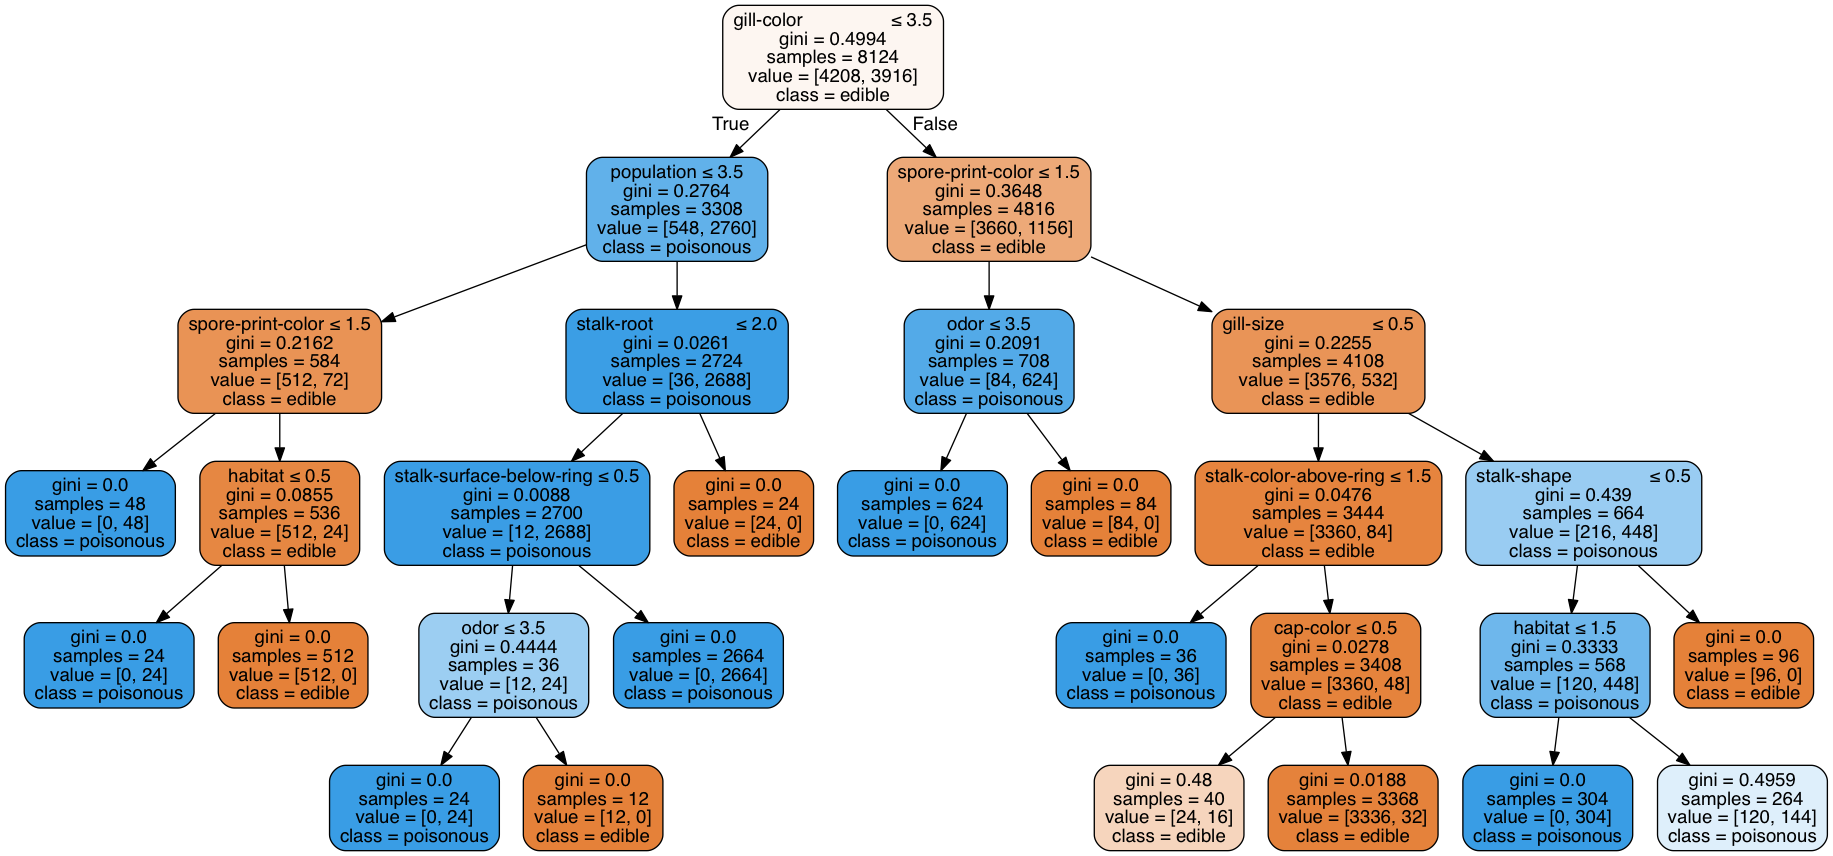

In [3]:
# Visualize the decision tree with class names and feature names (See the first cell for the function)
Image(visualize_tree(dt, feature_names = 
                     open('agaricus-lepiota.feature-names').readlines(), 
                     class_names = ['edible', 'poisonous']))

### Decision Tree Example: Fruits
#### Note: This example illustrates that Decision Trees don't have to be binary trees or involve binary classification.

![DecisionTreeExample](images/DecisionTreeExample.png)

### Decision Tree Construction Ideas

- The general idea behind decision trees like any other classification algorithm is to partition the space of inputs based on their corresponding classes.
- Moreover, we are looking for the "best split" at each level. 
 - Often explained using an "impurity" measure or metric which tells us how certain a classification can be made using a particular query and all previously gained information. 
- We repeat the "best splitting" procedure recursively in a Divide and Conquer fashion.

### Metrics: Information Gain (Mutual Information)
#### Used by the ID3, C4.5 and C5.0 tree-generation algorithms. 
  
**Recall** Information Gain = Entropy(Parent) -  Weighted Sum of Entropy(Children)

$$IG(P,a) = H(P) - H(P|a)$$

Remember, the entropy is $\text{H(p)} = -\sum \limits_{i = 1}^{k_m} p_i \log_2 p_i$ where the query is concerned with some feature $x_k$ and the query has $k_m$ responses.

### A question to illustrate the Information Gain metric

Note:
 - The $[x+, y-]$ indicate the number of samples belonging to the two classes, say positive and negative. 
 - The topmost one denotes the number of positive and negative samples in the dataset before "any partitioning."

![DecisionTreeExample](images/InformationGain.png)

### Answer

- Entropy of the dataset, say $D$: 
$H(D) = -\left(\frac{29}{29 + 35} \log_2 \frac{29}{29 + 35} + \frac{35}{29 + 35} \log_2 \frac{35}{29 + 35}\right) = 0.99365071169$. So:

    - $H(D|A1) =  -\left(\frac{21}{21 + 5} \log_2 \frac{21}{21 + 5} +  \frac{5}{21 + 5} \log_2 \frac{5}{21 + 5}\right) = 0.70627408918$
    - $H(D| \neg A1) = -\left(\frac{8}{8 + 20} \log_2 \frac{8}{8 + 30} + \frac{30}{8 + 30} \log_2 \frac{30}{8 + 30}\right) = 0.74248756954$


### Answer (Continued): Calculation of Weighting for Children when using Attribute $A1$

- Weighting for $A1 = $ $\frac{21 + 5}{29 + 35} = \frac{26}{64} = 0.40625$
- Weighting for $\neg A1 = $ $\frac{8 + 30}{29 + 35} = \frac{38}{64} = 0.59375$

### Answer (Continued): Weighted Sum of Entropy and Final Information Gain Calculation
- Weighted Sum of Entropy of Children = $0.70627408918 \cdot 0.40625 + 0.74248756954 \cdot 0.59375 = 0.7277758431$
- Therefore, the information gain using attrbiute $A1 = 0.99365071169 - 0.7277758431 = 0.2658748686$

### Answer (Continued): Final Answer

Repeating the process shown for attribute $A2$, we get that the information gain for attribute $A2 = 0.1214$ < the information gain for attribute $A1 = 0.2658$.

### So, what is Information Gain?

- Intuitively, Information Gain captures: 
 - The mutual information that there is between an attribute and the class labels, or, equivalently, 
 - The reduction in entropy gained by observing an attribute.
- Another intersting note: 
 - Mutual information (i.e., Information Gain) and KL-divergence are connected: $IG(X, Y) = D_{KL}(p(x, y) \mid \mid p(x)p(y))$.

### Metrics: Misclassification Error

$I(N) = 1 - \max \limits_{i} P(i \mid N)$ for a query node $N$

- Measures misclassification error made by a node.
- Maximum $(1 - 1/K)$ when samples are equally distributed among all classes, implying node $N$ provides really no information. (Note: $K$ is the number of classes)
- Minimum $(0.0)$ when all samples belong to one class, implying node $N$ provides enough information to be fully certain in the classification.

###  Metrics: Gini Impurity
#### Used by the CART (Classification and Regression Tree) Algorithm.
- A measure of how often a randomly chosen element from the set would be incorrectly labeled if it were randomly labeled according to the distribution of labels in the subset. 
- To compute Gini impurity for a set of  m  items, suppose $i \in \{1, 2, ..., m\}$, and let $f_i$ be the fraction of items labeled with value $i$ in the set.
    $$I_{G}(f) = \sum_{i=1}^{m} f_i (1-f_i) = \sum_{i=1}^{m} (f_i - {f_i}^2) = \\ \sum_{i=1}^m f_i - \sum_{i=1}^{m} {f_i}^2 = 1 - \sum^{m}_{i=1} {f_i}^{2} = \sum_{i\neq k}f_i f_k$$ 

In [4]:
%matplotlib inline

def gini(p):
    return (p) * (1 - p) + (1 - p) * (1 - (1 - p))

def entropy(p):
    return -(p * np.log2(p) + (1 - p) * np.log2(1 - p))

def error(p):
    return 1 - np.max([p, 1 - p])

def plot_impurity_metrics():
    x = np.arange(0.0, 1.0, 0.01)
    entropy_t = [entropy(p) if p != 0 else None for p in x]
    entropy_scaled_t = [0.5 * i if i != None else None for i in entropy_t]
    gini_t = [gini(p) for p in x]
    error_t = [error(p) for p in x]

    fig = plt.figure()
    ax = plt.subplot(111)

    for i, lab, ls, c in zip([entropy_t, entropy_scaled_t, gini_t, error_t], 
                             ['Entropy', 'Entropy (Scaled)', 'Gini', 'Misclassification Error'], 
                             ['-', '-', '--', '-.'], ['black', 'lightgray', 
                             'red', 'lightgreen', 'cyan']):
        line = ax.plot(x, i, label = lab, linestyle = ls, color = c, lw = 2)
    ax.legend(loc = 'upper center', ncol = 3, bbox_to_anchor = (0.5, 1.15), fancybox = True, shadow = False)
    ax.axhline(y = 1, linewidth = 1, color = 'k', linestyle = '--')
    ax.axhline(y = 0.5, linewidth = 1, color = 'k', linestyle = '--')
    plt.ylim([0, 1.1])
    plt.xlabel('p(Attribute = True)')
    plt.ylabel('Impurity Index')

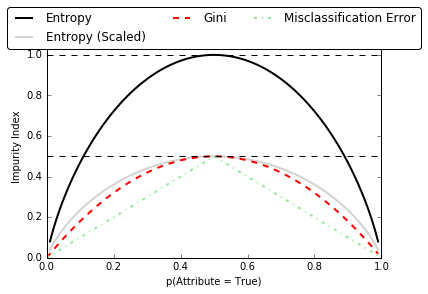

In [5]:
# The Metrics Illustrated in a Graph For a 2-Class Problem 
plot_impurity_metrics()
# Note: The Gini Impurity Index is in between the misclassifcation 
#       error curve and the scaled Entropy Curve!

### Choosing an Impurity Measure
All three measures are similar, and often construct identical trees. However:
- Entropy and Gini are differentiable, and hence more subject to numerical optimization.
- Entropy and Gini are more sensitive to changes in the node probabilities than Misclassification error.
- Entropy maybe slow to compute.
- Entropy is suggested for exploratory analysis as it is based on mutual information and thus may reveal insights about the data.
- Gini Impurity is suggested to minimize misclassification (see the note on the previous slide.)

### Pseudocode Iterative Dichotomizer 3 (ID3)

* ID3 was first "decision tree" alg.
* Precursor to C4.5 Alg. [More here](https://en.wikipedia.org/wiki/ID3_algorithm)

<img width=80% src="images/ID3Pseudocode.png">

### The Value of Labeled Data
- Labeled data is often hard to come by, various approaches can be taken to mitigate this however.
- In general, we can use many semi-supervised techniques.
- Active Learning is a particularly notable one, used in for example 20-Questions like games.

In [6]:
### Decision Tree Active Learning Example: Animal Game 

import string

class node :
    "Node objects have a question, and  left and right pointer to other nodes"
    def __init__ (self, question, left=None, right=None) :
        self.question = question
        self.left     = left
        self.right    = right

def yes (ques) :
    "Force the user to answer 'yes' or 'no' or something similar. Yes returns true"
    while 1 :
        ans = raw_input (ques)
        ans = string.lower(ans[0:1])
        if ans == 'y' : return 1
        elif ans == 'n' : return 0

knowledge = node("bird")

def active_learning_example (suppress=True) :
    "Guess the animal. Add a new node for a wrong guess."
    first = True
    while not suppress and (first or yes("Continue? (y/n)")):
        if first: 
            first = False
        print
        if not yes("Are you thinking of an animal? (y/n)") : break
        p = knowledge
        while p.left != None :
            if yes(p.question+"? ") : p = p.right
            else                    : p = p.left
    
        if yes("Is it a " + p.question + "? ") : continue
        animal   = raw_input ("What is the animals name? ")
        question = raw_input ("What question would distinguish a %s from a %s? "
                                            % (animal, p.question))
        p.left     = node(p.question)
        p.right    = node(animal)
        p.question = question
    
        if not yes ("If the animal were %s the answer would be? (y/n)" % animal) :
            (p.right, p.left) = (p.left, p.right)

In [7]:
# Interactive Active Learning Example
# Change suppress to False and run this cell to see demonstration
active_learning_example(suppress=True)

### Generalizations of Decision Trees (1)
- Decision Trees in their simplest form involve:
 - A 2-class scenario, with, 
 - Binary Features, and use a,
 - Binary Tree (every node has at most 2 children).
  
However, generalizations are possible.

### Generalizations of Decision Trees (2)
- Categorical Features 
 - Can use $n$-ary trees rather than binary search trees 
   - Fruits Tree Example: Color? asked at the root had three choices: Red, Yellow or Green (Ternary Tree)
 - Can use questions such as "$x_i$ = $l$?" or even $"2 \leq x_i \leq l$?", where $x_i \in \{1, ..., l, ..., K\}$?
   - The Mushroom Classification Tree was an example of this (Binary Tree with comparative rather than only equality checking conditions).

### Generalizations of Decision Trees (3)
- Categorical Output/Multiclass Scenario (the Fruits Example)
 - One way to handle categorical outputs is to pose a question such as "Is it a bird?" when "Yes" is expected. This keeps the outputs binary. 
    Moreover, if the answer is no, one can then use active learning as shown before to improve the tree.
 - Another way is to simply use a one-hot encoding for the output (Ex: Bird corresponds to $[0, 0, 0, 0, 0, 1, 0]$) 
- Real-Valued Response (Output) - Owing to the nature of trees, regression usually involves discretizing the output space either in some way. Once discretized, everything is the same.

### Inductive Bias

- What is the policy by which a particular decision tree algorithm generalizes from observed training examples to classify unseen instances?

- ***Definition:*** The set of assumptions that, together with the training data, deductively justify the classifications assigned by the learner to future instances.

- We can also think of this bias as an algorithms preference.

[More here](https://en.wikipedia.org/wiki/Inductive_bias)

### Inductive Bias of Decision Tree Algorithms

- When a decision tree is built, it is almost always not the only tree that will perfectly classify the training set!
- Finding the inductive bias of a decision tree algorithm is basically trying to find the type of tree that the algorithm favors in general. 
- It turns out that two of the common decision tree algorithms (ID3 and C4.5) have the same approximate inductive bias:
 - Prefers shorter trees over larger trees, and,
 - Trees that place high information gain attributes close to the root over those that do not. 

### Occam's Razor

- If a larger tree classifies the training set just as well as the shorter hypothesis, then we would logically want to use the shorter tree as it performs the same, is smaller, and is quicker to build.
- But is it always the case that shorter, more simpler hypotheses are preferred over larger ones? 
- This is a question that has been debated for centuries, and the answer still remains unclear. 
- This bias of preferring the simplest hypothesis that fits the data is known as Occam's razor. That is, "the simpler the better."

### Decision Tree Limitations (1)

Decision Trees in general perform well with lots of data, are robust to violations of assumptions, and probably most strikingly are easy to understand and interpret. However:
 - The problem of Learning an optimal Decision Trees is NP-Complete under several definitions of optimal.
  - Standard algs are "greedy", make myopic decisions that may not be globally optimal.
 - There are concepts that are hard to learn using Decision Trees, which are also generally hard for other linear classifiers, as the Decision Tree learned is prohibitively large. These include "toy" problems such as: 
  - XOR, Parity or Multiplexer based Problems